In [ ]:
pip install Augmentor


In [ ]:


import Augmentor 
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import numpy as np


import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy


plt.ion()   # interactive mode

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
class ImageFolderWithPaths(datasets.ImageFolder):
    """Custom dataset that includes image file paths. Extends
    torchvision.datasets.ImageFolder
    """

    # override the __getitem__ method. this is the method that dataloader calls
    def __getitem__(self, index):
        # this is what ImageFolder normally returns 
        original_tuple = super(ImageFolderWithPaths, self).__getitem__(index)
        # the image file path
        path = self.imgs[index][0]
        # make a new tuple that includes original and the path
        tuple_with_path = (original_tuple + (path,))
        return tuple_with_path


In [ ]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((299,299)),
        #transforms.RandomResizedCrop(224),
        #transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((299,299)),
       # transforms.CenterCrop(224),
        #transforms.RandomResizedCrop(224),
        #transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]), 
}
#Batch_size={}
#Batch_size['train']=8
#Batch_size['val']=1
data_dir = '/content/drive/My Drive/Stanford40/body'
image_datasets = {x: ImageFolderWithPaths(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train','val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=8,
                                             shuffle=True, num_workers=4)
              for x in ['train','val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train','val']}
class_names = image_datasets['train'].classes
num_classes=len(class_names)
print(num_classes)


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(dataset_sizes)
print(class_names)
class_datapoints = torch.zeros(num_classes, dtype=torch.long)

for _,label,_ in dataloaders['train']:
 for i in label:
   class_datapoints[i]+=1
print(class_datapoints)
dataclass={}
for i in range(0,11):
  dataclass[class_names[i]]=class_datapoints[i].item()
print(dataclass)


data_class={k: v for k, v in sorted(dataclass.items(), key=lambda item: item[1])}
print(data_class)



11
{'train': 1900, 'val': 846}
['Cleaning_floor', 'Climbing', 'Jumping', 'Riding_bike', 'Riding_horse', 'Rowing_boat', 'Running', 'Shooting_arrow', 'Throwing_frisby', 'Walking_dog', 'Waving_hands']
tensor([150, 200, 200, 200, 200, 130, 170, 150, 150, 200, 150])
{'Cleaning_floor': 150, 'Climbing': 200, 'Jumping': 200, 'Riding_bike': 200, 'Riding_horse': 200, 'Rowing_boat': 130, 'Running': 170, 'Shooting_arrow': 150, 'Throwing_frisby': 150, 'Walking_dog': 200, 'Waving_hands': 150}
{'Rowing_boat': 130, 'Cleaning_floor': 150, 'Shooting_arrow': 150, 'Throwing_frisby': 150, 'Waving_hands': 150, 'Running': 170, 'Climbing': 200, 'Jumping': 200, 'Riding_bike': 200, 'Riding_horse': 200, 'Walking_dog': 200}


In [ ]:
#p=Augmentor.Pipeline('/content/drive/My Drive/ppmi_12_class/play_instrument/dataset/train/bassoon')
#p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
#p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
#p.flip_left_right(probability=0.5)
#p.flip_top_bottom(probability=0.5)
#p.sample(100)
data_dir = '/content/drive/My Drive/Stanford40/body/train'
out_dir='/content/drive/My Drive/Stanford40/body/aug_train'
size=[30,50,80,180,200,300,400,700,800,900,1000]
i=0
for k in data_class.keys():
  #print(k)
  p=Augmentor.Pipeline(os.path.join(data_dir,k),os.path.join(out_dir,k))
  p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
  p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
  p.flip_left_right(probability=0.5)
  p.sample(size[i])
  i+=1

  



Processing <PIL.Image.Image image mode=RGB size=452x300 at 0x7FD820475278>:   3%|▎         | 1/30 [00:00<00:05,  5.39 Samples/s]

Initialised with 130 image(s) found.
Output directory set to /content/drive/My Drive/Stanford40/body/aug_train/Rowing_boat.

Processing <PIL.Image.Image image mode=RGB size=204x200 at 0x7FD8204DF978>: 100%|██████████| 30/30 [00:00<00:00, 49.25 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7FD82891F3C8>:   2%|▏         | 1/50 [00:00<00:07,  6.74 Samples/s]

Initialised with 150 image(s) found.
Output directory set to /content/drive/My Drive/Stanford40/body/aug_train/Cleaning_floor.

Processing <PIL.Image.Image image mode=RGB size=300x371 at 0x7FD82049B5F8>: 100%|██████████| 50/50 [00:01<00:00, 49.47 Samples/s]
Executing Pipeline:   0%|          | 0/80 [00:00<?, ? Samples/s]

Initialised with 150 image(s) found.
Output directory set to /content/drive/My Drive/Stanford40/body/aug_train/Shooting_arrow.

Processing <PIL.Image.Image image mode=RGB size=422x400 at 0x7FD820427438>: 100%|██████████| 80/80 [00:01<00:00, 42.24 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=300x426 at 0x7FD82891C470>:   2%|▏         | 3/180 [00:00<00:26,  6.77 Samples/s]

Initialised with 150 image(s) found.
Output directory set to /content/drive/My Drive/Stanford40/body/aug_train/Throwing_frisby.

Processing <PIL.Image.Image image mode=RGB size=400x426 at 0x7FD820460860>: 100%|██████████| 180/180 [00:03<00:00, 51.92 Samples/s]
Executing Pipeline:   0%|          | 0/200 [00:00<?, ? Samples/s]

Initialised with 150 image(s) found.
Output directory set to /content/drive/My Drive/Stanford40/body/aug_train/Waving_hands.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x7FD82042B6A0>: 100%|██████████| 200/200 [00:04<00:00, 45.12 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=472x300 at 0x7FD8289213C8>:   0%|          | 1/300 [00:00<00:37,  7.98 Samples/s]

Initialised with 170 image(s) found.
Output directory set to /content/drive/My Drive/Stanford40/body/aug_train/Running.

Processing <PIL.Image.Image image mode=RGB size=300x450 at 0x7FD820419160>: 100%|██████████| 300/300 [00:06<00:00, 48.30 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x452 at 0x7FD82891CD68>:   2%|▏         | 8/400 [00:00<00:54,  7.15 Samples/s]

Initialised with 200 image(s) found.
Output directory set to /content/drive/My Drive/Stanford40/body/aug_train/Climbing.

Processing <PIL.Image.Image image mode=RGB size=300x450 at 0x7FD8203C9470>: 100%|██████████| 400/400 [00:07<00:00, 51.69 Samples/s]
Executing Pipeline:   0%|          | 0/700 [00:00<?, ? Samples/s]

Initialised with 200 image(s) found.
Output directory set to /content/drive/My Drive/Stanford40/body/aug_train/Jumping.

Processing <PIL.Image.Image image mode=RGB size=400x300 at 0x7FD820333908>: 100%|██████████| 700/700 [00:13<00:00, 50.79 Samples/s]
Executing Pipeline:   0%|          | 0/800 [00:00<?, ? Samples/s]

Initialised with 200 image(s) found.
Output directory set to /content/drive/My Drive/Stanford40/body/aug_train/Riding_bike.

Processing <PIL.Image.Image image mode=RGB size=200x224 at 0x7FD8202ECD68>: 100%|██████████| 800/800 [00:16<00:00, 47.47 Samples/s]
Executing Pipeline:   0%|          | 0/900 [00:00<?, ? Samples/s]

Initialised with 200 image(s) found.
Output directory set to /content/drive/My Drive/Stanford40/body/aug_train/Riding_horse.

Processing <PIL.Image.Image image mode=RGB size=438x300 at 0x7FD8203D7C18>: 100%|██████████| 900/900 [00:18<00:00, 49.25 Samples/s]
Executing Pipeline:   0%|          | 0/1000 [00:00<?, ? Samples/s]

Initialised with 200 image(s) found.
Output directory set to /content/drive/My Drive/Stanford40/body/aug_train/Walking_dog.

Processing <PIL.Image.Image image mode=RGB size=390x300 at 0x7FD8202BEB38>: 100%|██████████| 1000/1000 [00:20<00:00, 48.23 Samples/s]


In [ ]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'aug_train': transforms.Compose([
        transforms.Resize((299,299)),
        #transforms.RandomResizedCrop(224),
        #transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((299,299)),
        #transforms.CenterCrop(224),
        transforms.ToTensor(),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]), 
}


data_dir = '/content/drive/My Drive/Stanford40/body'
image_datasets = {x: ImageFolderWithPaths(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['aug_train','val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=8,
                                             shuffle=True, num_workers=4)
              for x in ['aug_train','val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['aug_train','val']}
class_names = image_datasets['aug_train'].classes
num_classes=len(class_names)
print(num_classes)


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(dataset_sizes)
print(class_names)
class_datapoints = torch.zeros(num_classes, dtype=torch.long)

for _,label,_ in dataloaders['aug_train']:
 for i in label:
   class_datapoints[i]+=1
print(class_datapoints)


11
{'aug_train': 4640, 'val': 846}
['Cleaning_floor', 'Climbing', 'Jumping', 'Riding_bike', 'Riding_horse', 'Rowing_boat', 'Running', 'Shooting_arrow', 'Throwing_frisby', 'Walking_dog', 'Waving_hands']
tensor([  50,  400,  700,  800,  900,   30,  300,   80,  180, 1000,  200])


In [ ]:
'''import cv2
for i in range (0,8):
  im=images[i].numpy()
  
  im_aug=im.transpose((1,2,0))
  
  
  
  plt.imshow(im_aug)
  plt.savefig('_augment'+str(i)+'.jpg')
  plt.figure()
  im_original=cv2.imread(paths[i])
  plt.imshow(im_original[:,:,[2,1,0]])
  plt.savefig('_original'+str(i)+'.jpg')
  

  


  #plt.savefig(('augmented image'+str(i)))
'''

"import cv2\nfor i in range (0,8):\n  im=images[i].numpy()\n  \n  im_aug=im.transpose((1,2,0))\n  \n  \n  \n  plt.imshow(im_aug)\n  plt.savefig('_augment'+str(i)+'.jpg')\n  plt.figure()\n  im_original=cv2.imread(paths[i])\n  plt.imshow(im_original[:,:,[2,1,0]])\n  plt.savefig('_original'+str(i)+'.jpg')\n  \n\n  \n\n\n  #plt.savefig(('augmented image'+str(i)))\n"

In [ ]:

"""Imshow for Tensor."""
'''
for i in range (8):
  inp=images[i]
  inp = inp.numpy().transpose((1, 2, 0))
  #mean = np.array([0.485, 0.456, 0.406])
  #std = np.array([0.229, 0.224, 0.225])
  #inp = std * inp + mean
  plt.imshow(inp)
  plt.figure()
'''    

'\nfor i in range (8):\n  inp=images[i]\n  inp = inp.numpy().transpose((1, 2, 0))\n  #mean = np.array([0.485, 0.456, 0.406])\n  #std = np.array([0.229, 0.224, 0.225])\n  #inp = std * inp + mean\n  plt.imshow(inp)\n  plt.figure()\n'

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    losses=[]
    accuracies=[]

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['aug_train', 'val']:
            if phase == 'aug_train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels,paths in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
               

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'aug_train'):
                    outputs = model(inputs)
                  
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                 



                    # backward + optimize only if in training phase
                    if phase == 'aug_train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
          

            print('{} Loss: {:.4f} Acc: {:.4f} '.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase=='aug_train':
              losses.append(epoch_loss)
              accuracies.append(epoch_acc)


        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model,losses,accuracies

In [ ]:

#model_ft = models.resnet50(pretrained=True)
#num_ftrs = model_ft.fc.ifeatures
#model_ft.fc = nn.Linear(num_ftrs, 11)

#model_ft = models.densenet161(pretrained=True)
#model_ft.classifier=nn.Linear(2208,29)

#model_ft = models.vgg19_bn(pretrained=True)
#model_ft.classifier._modules['6']=nn.Linear(4096,12) 

#model_ft = models.vgg16(pretrained=True)
#model_ft.classifier._modules['6']=nn.Linear(4096,7)

#model_ft = models.vgg16_bn(pretrained=True)
#model_ft.classifier._modules['6']=nn.Linear(4096,7)

#model_ft = models.vgg11(pretrained=True)
#model_ft.classifier._modules['6']=nn.Linear(4096,7)

#model_ft = models.vgg11_bn(pretrained=True)
#model_ft.classifier._modules['6']=nn.Linear(4096,7)

#model_ft = models.vgg13(pretrained=True)
#model_ft.classifier._modules['6']=nn.Linear(4096,7)


#model_ft = models.vgg13_bn(pretrained=True)
#model_ft.classifier._modules['6']=nn.Linear(4096,7)
#model_ft = models.resnet18(pretrained=True)
#model_ft.fc= nn.Linear(512,7)
#model_ft = models.resnet34(pretrained=True)
#model_ft.fc= nn.Linear(512,7)



#model_ft = models.resnet18(pretrained=True)
#model_ft.fc= nn.Linear()

#model_ft = models.resnet34(pretrained=True)
#model_ft.fc= nn.Linear()

#model_ft = models.resnet101(pretrained=True)
#model_ft.fc= nn.Linear()

model_ft = models.resnet152(pretrained=True)
model_ft.fc= nn.Linear(2048,11)


#model_ft=models.alexnet(pretrained=True)
#model_ft

#model_ft = models.squeezenet1_0(pretrained=True)
#model_ft

#model_ft = models.squeezenet1_1(pretrained=True)
#model_ft

#model_ft = models.densenet121(pretrained=True)
#model_ft 

#model_ft = models.densenet161(pretrained=True)
#model_ft

#model_ft = models.densenet169(pretrained=True)
#model_ft

#model_ft = models.densenet201(pretrained=True)
#model_ft

#model_ft = models.inception_v3(pretrained=True)  ##need input size 299,299
#model_ft

#model_ft = models.googlenet(pretrained=True)
#model_ft

#model_ft = models.shufflenet_v2_x1_0(pretrained=True)
#model_ft = 

#model_ft = models.mobilenet_v2(pretrained=True)
#model_ft

#model_ft = models.wide_resnet50_2(pretrained=True)
#model_ft

#model_ft = models.mnasnet0_5(pretrained=True)
#model_ft

#model_ft = models.mnasnet0_75(pretrained=True)
#model_ft

#model_ft = models.mnasnet1_0(pretrained=True)
#model_ft

#model_ft = models.mnasnet1_3(pretrained=True)
#model_ft



model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=5, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth


In [ ]:
model_ft,losses,accuracies = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,num_epochs=30)

Epoch 0/29
----------


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


aug_train Loss: 0.5373 Acc: 0.8412 
val Loss: 0.2552 Acc: 0.9326 

Epoch 1/29
----------
aug_train Loss: 0.1023 Acc: 0.9761 
val Loss: 0.1567 Acc: 0.9610 

Epoch 2/29
----------
aug_train Loss: 0.0497 Acc: 0.9871 
val Loss: 0.1445 Acc: 0.9551 

Epoch 3/29
----------
aug_train Loss: 0.0264 Acc: 0.9955 
val Loss: 0.2000 Acc: 0.9338 

Epoch 4/29
----------
aug_train Loss: 0.0175 Acc: 0.9966 
val Loss: 0.1490 Acc: 0.9574 

Epoch 5/29
----------
aug_train Loss: 0.0129 Acc: 0.9983 
val Loss: 0.1465 Acc: 0.9527 

Epoch 6/29
----------
aug_train Loss: 0.0120 Acc: 0.9987 
val Loss: 0.1338 Acc: 0.9586 

Epoch 7/29
----------
aug_train Loss: 0.0128 Acc: 0.9974 
val Loss: 0.1284 Acc: 0.9598 

Epoch 8/29
----------
aug_train Loss: 0.0113 Acc: 0.9989 
val Loss: 0.1225 Acc: 0.9645 

Epoch 9/29
----------
aug_train Loss: 0.0107 Acc: 0.9991 
val Loss: 0.1317 Acc: 0.9610 

Epoch 10/29
----------
aug_train Loss: 0.0097 Acc: 0.9991 
val Loss: 0.1286 Acc: 0.9681 

Epoch 11/29
----------
aug_train Loss: 0.0

In [ ]:
torch.save(model_ft.state_dict(),'/content/drive1/My Drive/ppmi 24 nets/resnet152.pth')

In [ ]:
model = models.resnet152(pretrained=False)
model.fc=nn.Linear(2048,24) 


model.load_state_dict(torch.load('/content/drive1/My Drive/ppmi 24 nets/resnet152.pth'))
model=model.to(device)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics



from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report

In [ ]:
test_tuple=datasets.ImageFolder('/content/drive/My Drive/Stanford40/body/val',transform=data_transforms['val'])
test_dataloader=torch.utils.data.DataLoader(test_tuple,batch_size=1,shuffle=True)
#test_dataloader=dataloaders['val']
class_names=test_tuple.classes
i=0
#print(len(test_tuple))
length=dataset_sizes['val']
y_true=torch.zeros([length,1])
y_pred=torch.zeros([length,1])
for inputs ,labels in test_dataloader:

  model_ft.eval()

  inputs=inputs.to(device)
  outputs=model_ft(inputs)

   
  y_true[i][0]=labels
   
  maxvlaues,indices = torch.max(outputs, 1)
  y_pred[i][0]=indices
  #print(y_true[i][0],y_pred[i][0])
  i=i+1
  #print(i)
   
   
   
   


In [ ]:
true=y_true.numpy()
pred=y_pred.numpy()
precision = metrics.precision_score(true,pred,average='macro')
recall = metrics.recall_score(true,pred,average='macro')
accuracy = metrics.accuracy_score(true,pred)
f1_score = metrics.f1_score(true,pred,average='macro')
print('Confusion Matrix:\n',metrics.confusion_matrix(true, pred))

print('Precision: {} Recall: {}, Accuracy: {}: ,f1_score: {}'.format(precision,recall,accuracy,f1_score))
repo=classification_report(true,pred,target_names=class_names)
print(repo)


Confusion Matrix:
 [[61  0  0  0  0  0  0  0  0  1  0]
 [ 0 95  0  0  0  0  0  0  0  0  0]
 [ 0  1 88  0  0  0  3  1  1  1  0]
 [ 0  0  0 93  0  0  0  0  0  0  0]
 [ 0  0  0  0 96  0  0  0  0  0  0]
 [ 0  0  0  0  0 55  0  0  0  0  0]
 [ 1  0  4  0  0  0 74  0  1  0  1]
 [ 0  0  1  0  0  0  0 63  0  0  0]
 [ 0  0  1  0  0  0  3  0 48  0  0]
 [ 0  0  0  0  0  0  1  0  0 92  0]
 [ 0  0  2  0  0  0  0  1  0  0 57]]
Precision: 0.9722194553482963 Recall: 0.9700423853667346, Accuracy: 0.9716312056737588: ,f1_score: 0.9710601047226365
                 precision    recall  f1-score   support

 Cleaning_floor       0.98      0.98      0.98        62
       Climbing       0.99      1.00      0.99        95
        Jumping       0.92      0.93      0.92        95
    Riding_bike       1.00      1.00      1.00        93
   Riding_horse       1.00      1.00      1.00        96
    Rowing_boat       1.00      1.00      1.00        55
        Running       0.91      0.91      0.91        81
 Shooting

In [ ]:
text_file=open("stanford 40 non-body augval.txt",'w',newline='\n')
text_file.write(repo)
text_file.close()

Confusion matrix, without normalization


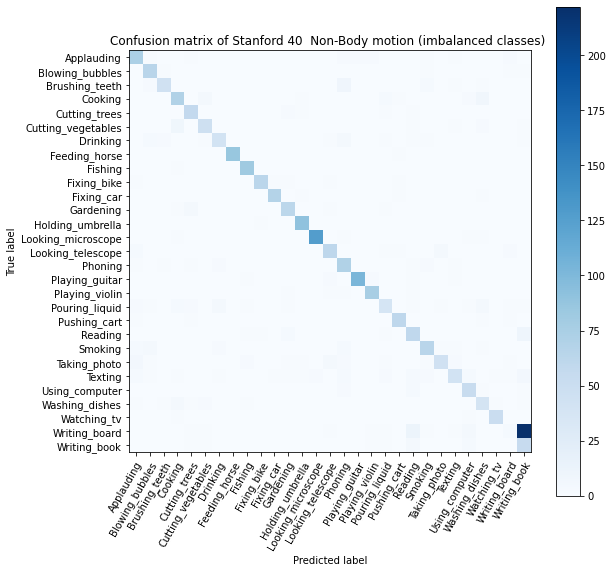

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
# Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    fig, ax = get_new_fig('eljfnekwg',figsize=[9,9])
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
        # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
              yticks=np.arange(cm.shape[0]),
              # ... and label them with the respective list entries
    xticklabels=classes, yticklabels=classes,
              title=title,
              ylabel='True label',
              xlabel='Predicted label')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=60, ha="right",
                rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    #fmt = '.2f' if normalize else 'd'
    #thresh = cm.max() / 2.
    #for i in range(cm.shape[0]):
        #for j in range(cm.shape[1]):
            #ax.text(j, i, format(cm[i, j], fmt),
                    #ha="center", va="center",
                    #color="white" if cm[i, j] > thresh else "black")
    

    return ax
plot_confusion_matrix(true, pred, classes= class_names,title='Confusion matrix of Stanford 40  Non-Body motion (imbalanced classes) ')

In [ ]:
def get_new_fig(fn, figsize=[9,9]):
    """ Init graphics """
    fig1 = plt.figure(fn, figsize)
    ax1 = fig1.gca()   #Get Current Axis
    ax1.cla() # clear existing plot
    return fig1, ax1